## Predict Loan Eligibility for Dream Housing Finance company
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

### Data Dictionary
### Train file: CSV containing the customers for whom loan eligibility is known as 'Loan_Status'

- **Variable** - Description
- **Loan_ID** - Unique Loan ID
- **Gender** -	Male/ Female
- **Married** -	Applicant married (Y/N)
- **Dependents** -	Number of dependents
- **Education** -	Applicant Education (Graduate/ Under Graduate)
- **Self_Employed** -	Self employed (Y/N)
- **ApplicantIncome** -	Applicant income
- **CoapplicantIncome** -	Coapplicant income
- **LoanAmount** -	Loan amount in thousands
- **Loan_Amount_Term** -	Term of loan in months
- **Credit_History** -	credit history meets guidelines
- **Property_Area** -	Urban/ Semi Urban/ Rural
- **Loan_Status** -	(Target) Loan approved (Y/N)

In [319]:
%matplotlib inline
import numpy as np
import pandas as pd
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [320]:
data = pd.read_csv('train_ctrUa4K.csv')

In [321]:
df = data.copy()

In [322]:
print('We have {} rows and {} Columns'.format(df.shape[0],df.shape[1]))
df.iloc[1,:]

We have 614 rows and 13 Columns


Loan_ID              LP001003
Gender                   Male
Married                   Yes
Dependents                  1
Education            Graduate
Self_Employed              No
ApplicantIncome          4583
CoapplicantIncome      1508.0
LoanAmount              128.0
Loan_Amount_Term        360.0
Credit_History            1.0
Property_Area           Rural
Loan_Status                 N
Name: 1, dtype: object

In [323]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Loan_ID is not a significant feature in predicting the Loan Status so we will drop the column.

In [325]:
df.drop('Loan_ID',axis=1,inplace=True)

### Missing Values

In [326]:
print("All attributes with no. of missing value in data : ")
null_values = pd.DataFrame({'total_missing': df.isnull().sum(), '%_missing': df.isnull().mean()*100,
                           'datatype':df.dtypes})
null_values[null_values['total_missing']>0].sort_values('total_missing',ascending=False)

All attributes with no. of missing value in data : 


,total_missing,%_missing,datatype
Credit_History,50,8.143322,float64
Self_Employed,32,5.211726,object
LoanAmount,22,3.583062,float64
Dependents,15,2.442997,object
Loan_Amount_Term,14,2.280130,float64
Gender,13,2.117264,object
Married,3,0.488599,object


## Exploratory Data Analysis

In [327]:
def countplot(columnName,data=df,hue=None):
    ax = sns.countplot(x=columnName, data=data,hue=hue)
    ax.bar_label(ax.containers[0])
    plt.show()

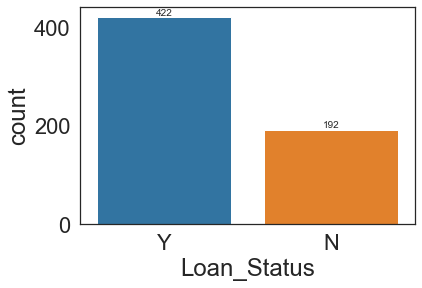

In [328]:
countplot('Loan_Status')

In [329]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

### Credit History

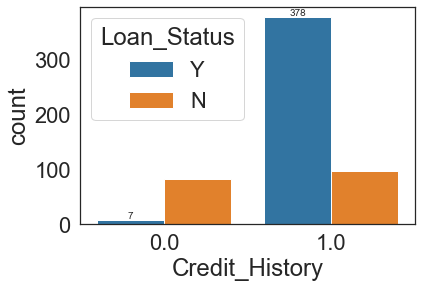

In [330]:
countplot('Credit_History',hue='Loan_Status')

In [331]:
df.groupby('Loan_Status').Credit_History.value_counts()

Loan_Status  Credit_History
N            1.0                97
             0.0                82
Y            1.0               378
             0.0                 7
Name: Credit_History, dtype: int64

Lets impute missing credit history with its '0' as there is no information on those data and it is a boolean variable.

In [332]:
df.Credit_History = df['Credit_History'].fillna(0)

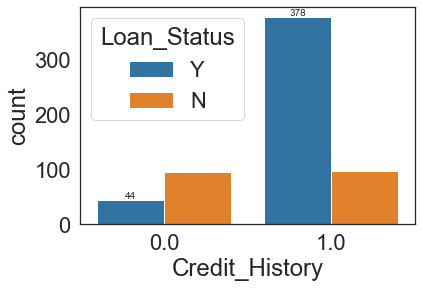

Loan_Status  Credit_History
N            1.0                97
             0.0                95
Y            1.0               378
             0.0                44
Name: Credit_History, dtype: int64

In [333]:
countplot('Credit_History',hue='Loan_Status')
df.groupby('Loan_Status').Credit_History.value_counts()

### Self_Employed

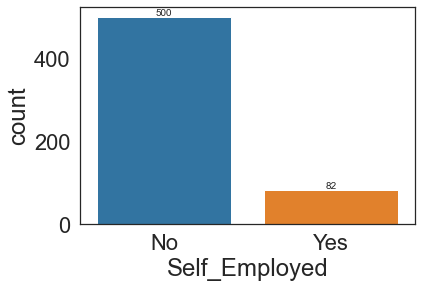

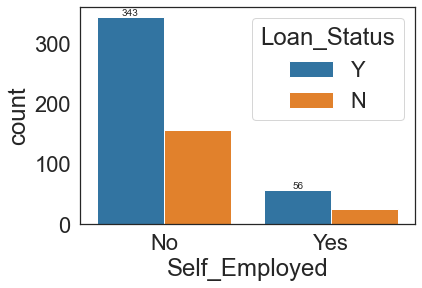

In [334]:
countplot('Self_Employed')
countplot('Self_Employed',hue='Loan_Status')

In [335]:
print("Loan approval rate of customer's with and without self employement are {:0.2f} and {:0.2f}.".format(343*100/500,56*100/82))

Loan approval rate of customer's with and without self employement are 68.60 and 68.29.


Data shows most of the customers applied for loan are not self employed and loan approval rate of customers with  and without self employed seems to be same. So, lets impute missing values of it with 'No'. And map "yes","No" with 1,0. 

In [336]:
df.Self_Employed = df.Self_Employed.fillna('No')
df.Self_Employed = df['Self_Employed'].map({'Yes':1,'No':0})

### Loan Amount

In [337]:
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean()) 

In [338]:
def distributionplot(x = df,colname = None):
    plt.figure(figsize=(20,6))

    sns.set_style("white")
    sns.set_context("notebook",font_scale=2)

    plt.subplot(1,2,1)
    ax = sns.distplot(x[colname])
    ax.set_title("Distribution plot of {}".format(colname));

    plt.subplot(1,2,2)
    ax1 = sns.boxplot(x[colname])
    ax1.set_title("Box Whisker plot of {}".format(colname));

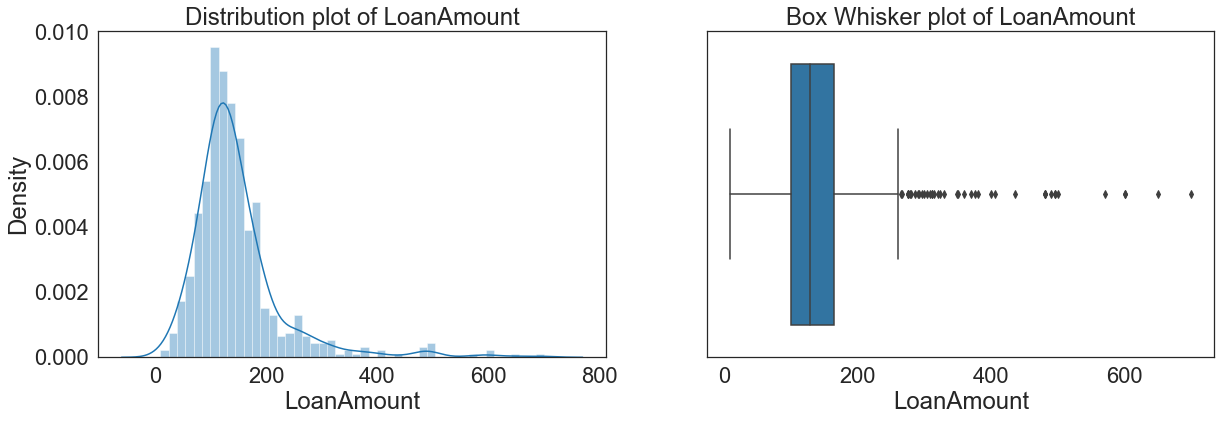

In [339]:
distributionplot(x = df,colname='LoanAmount')

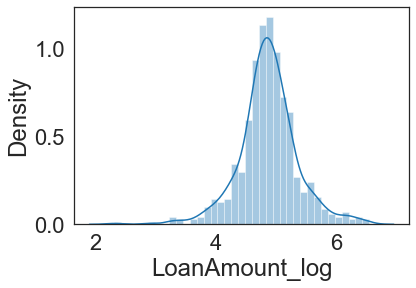

In [340]:
df['LoanAmount_log'] = np.log(df['LoanAmount'].values + 1)
sns.distplot(df['LoanAmount_log'])
plt.show()

Loan amount data distribution is right skewed. So transforming the variable as log of the variable to make the distribution it normal.

### Dependents

Dependents is a numerical variable lets change it to integer

In [341]:
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

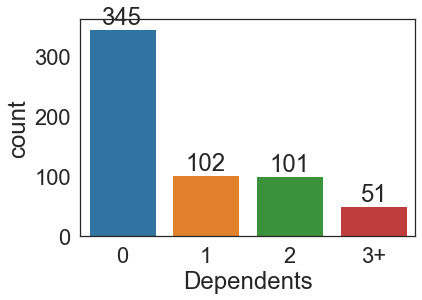

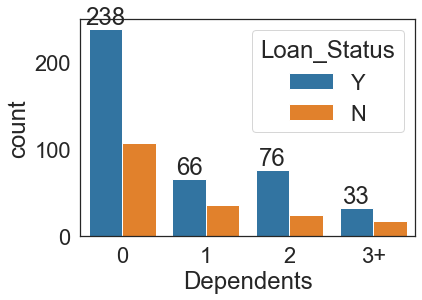

In [342]:
countplot('Dependents')
countplot('Dependents',hue='Loan_Status')

In [343]:
df.groupby('Loan_Status').Dependents.value_counts()

Loan_Status  Dependents
N            0             107
             1              36
             2              25
             3+             18
Y            0             238
             2              76
             1              66
             3+             33
Name: Dependents, dtype: int64

In [344]:
df[df.Dependents.isnull()].Loan_Status.value_counts()

Y    9
N    6
Name: Loan_Status, dtype: int64

Lets impute missing values in dependents variables with 0 as there most of the customers have no dependents and also lets combine classes of 1,2,3+ as 1 to indicate it as customers with dependents to reduces classes in dependents variable.

In [345]:
df.Dependents = df.Dependents.fillna(0)

In [346]:
df.Dependents = df.Dependents.apply(lambda x: 1 if x in ['1','2','3+'] else x).astype(int)

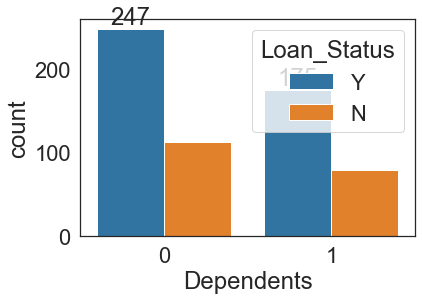

0    360
1    254
Name: Dependents, dtype: int64

In [347]:
countplot('Dependents',hue='Loan_Status')
df.Dependents.value_counts()

### Loan_Amount_Term

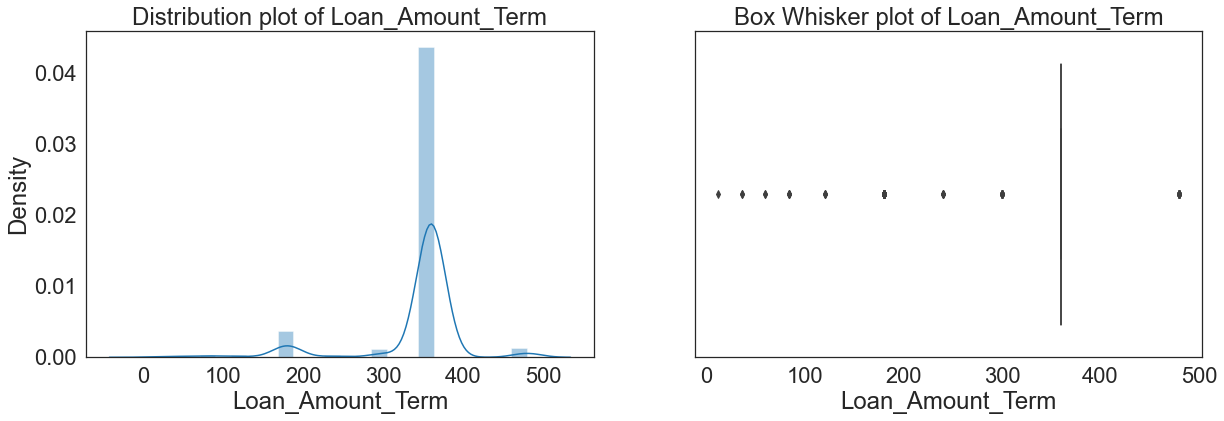

In [348]:
distributionplot(df,colname='Loan_Amount_Term')

In [349]:
df.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [350]:
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mean())

In [351]:
df['Loan_Amount_Term_New'] = df.Loan_Amount_Term.apply(lambda x: 'short<5Years' if x <= 60 else 'long>5Years' )

In [352]:
df.Loan_Amount_Term_New.value_counts()

long>5Years     609
short<5Years      5
Name: Loan_Amount_Term_New, dtype: int64

### Gender

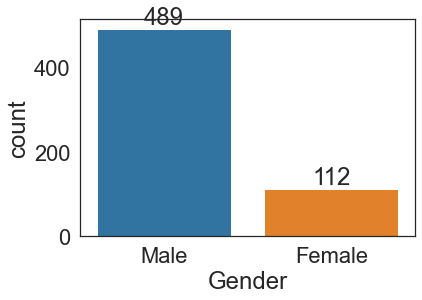

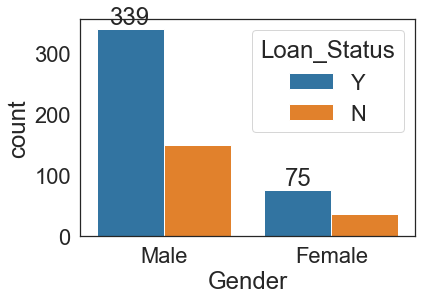

In [353]:
countplot('Gender')
countplot('Gender',hue='Loan_Status')

### Married

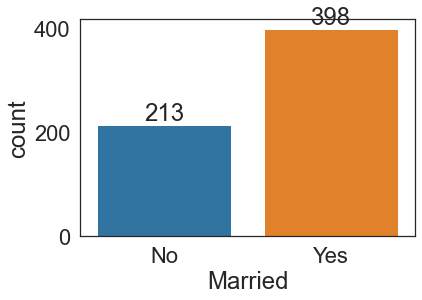

In [354]:
countplot(df.Married)

Mode for married variablke is Yes. So lets impute missing values with yes

In [355]:
df.Married = df.Married.fillna('Yes')

### Applicant Income

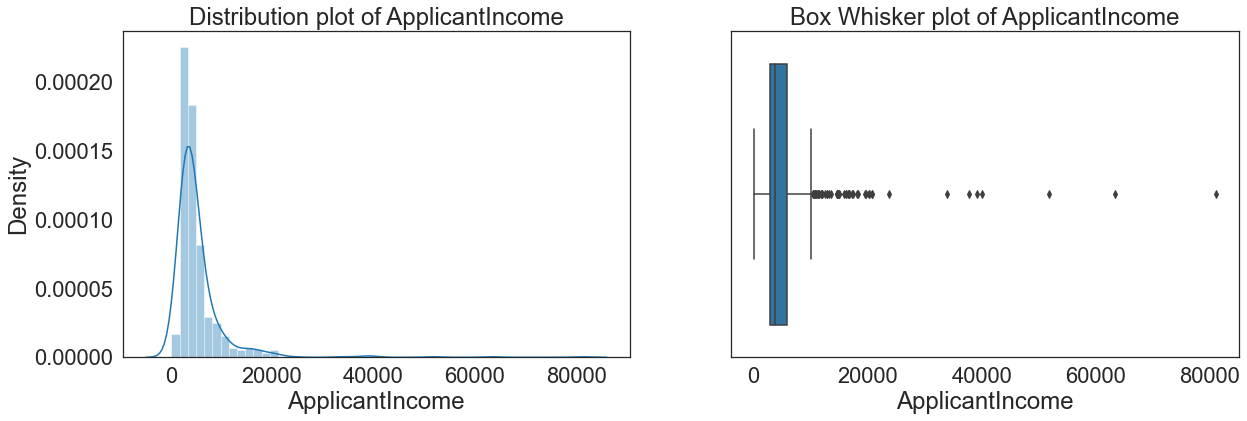

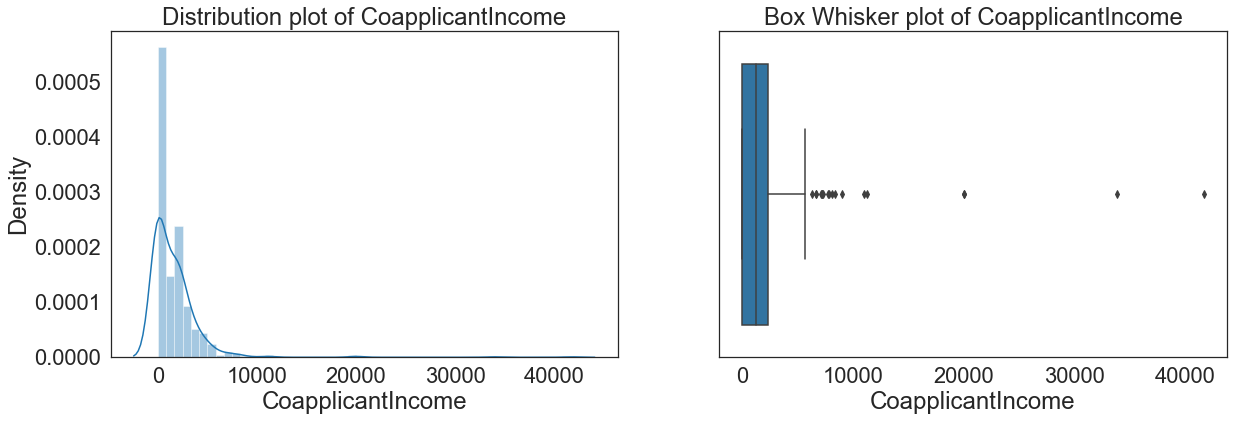

In [356]:
distributionplot(df,colname='ApplicantIncome')
distributionplot(df,colname='CoapplicantIncome')

In [357]:
df.ApplicantIncome.describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

Most of applicants income is below 6000

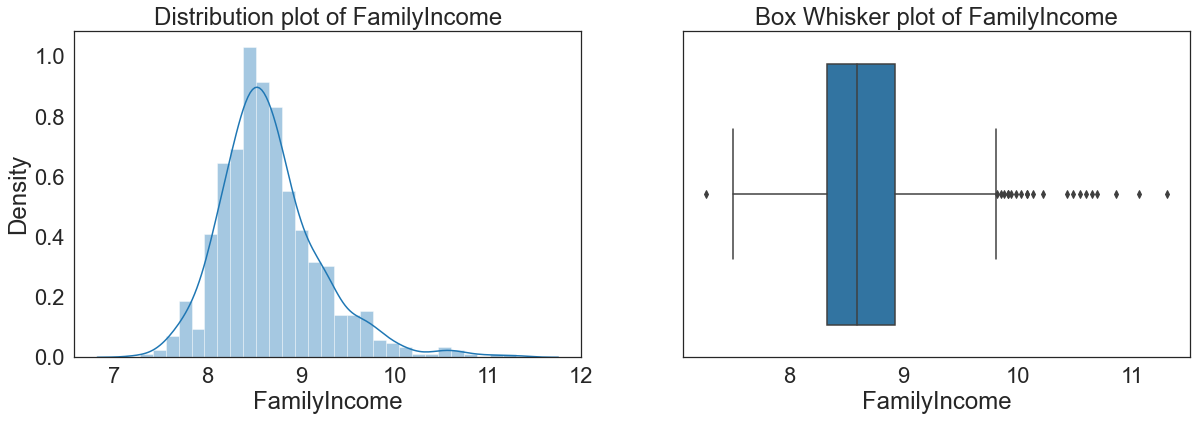

In [358]:
df['FamilyIncome'] =  np.log(df.ApplicantIncome+df.CoapplicantIncome)

distributionplot(df,colname='FamilyIncome')

In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                601 non-null    object 
 1   Married               614 non-null    object 
 2   Dependents            614 non-null    int32  
 3   Education             614 non-null    object 
 4   Self_Employed         614 non-null    int64  
 5   ApplicantIncome       614 non-null    int64  
 6   CoapplicantIncome     614 non-null    float64
 7   LoanAmount            614 non-null    float64
 8   Loan_Amount_Term      614 non-null    float64
 9   Credit_History        614 non-null    float64
 10  Property_Area         614 non-null    object 
 11  Loan_Status           614 non-null    object 
 12  LoanAmount_log        614 non-null    float64
 13  Loan_Amount_Term_New  614 non-null    object 
 14  FamilyIncome          614 non-null    float64
dtypes: float64(6), int32(1)

### Loan to income ratio

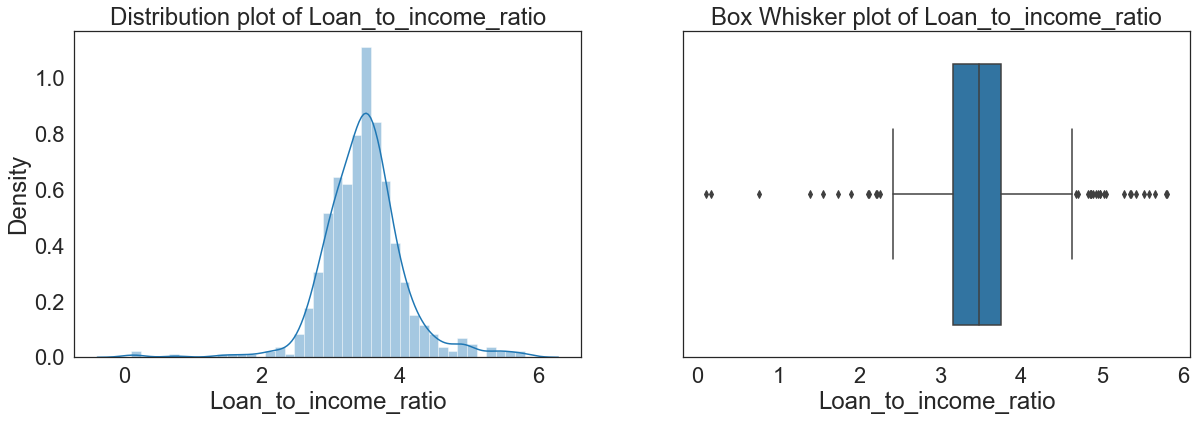

In [360]:
df['Loan_to_income_ratio'] = -np.log(df.LoanAmount/df.ApplicantIncome)
distributionplot(df,colname='Loan_to_income_ratio')

### Property_Area

In [361]:
df.Property_Area = df.Property_Area.map({'Rural':1,'Semiurban':2,'Urban':3})

In [362]:
features = pd.get_dummies(df.drop('Loan_Status',axis=1))

In [363]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Dependents                         614 non-null    int32  
 1   Self_Employed                      614 non-null    int64  
 2   ApplicantIncome                    614 non-null    int64  
 3   CoapplicantIncome                  614 non-null    float64
 4   LoanAmount                         614 non-null    float64
 5   Loan_Amount_Term                   614 non-null    float64
 6   Credit_History                     614 non-null    float64
 7   Property_Area                      614 non-null    int64  
 8   LoanAmount_log                     614 non-null    float64
 9   FamilyIncome                       614 non-null    float64
 10  Loan_to_income_ratio               614 non-null    float64
 11  Gender_Female                      614 non-null    uint8  

In [364]:
features.describe()

,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,FamilyIncome,Loan_to_income_ratio,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Loan_Amount_Term_New_long>5Years,Loan_Amount_Term_New_short<5Years
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.413681,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.773616,2.037459,4.870872,8.669414,3.479147,0.182410,0.796417,0.346906,0.653094,0.781759,0.218241,0.991857,0.008143
std,0.492894,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.418832,0.787482,0.491376,0.545102,0.590131,0.386497,0.402991,0.476373,0.476373,0.413389,0.413389,0.089945,0.089945
min,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,1.000000,2.302585,7.273786,0.105361,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,1.000000,4.617584,8.334712,3.152186,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,2.000000,4.867534,8.597205,3.473280,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,3.000000,5.110477,8.925549,3.749004,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,3.000000,6.552508,11.302204,5.803779,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [365]:
from sklearn.preprocessing import MinMaxScaler

In [366]:
scale = MinMaxScaler()

x = pd.DataFrame(scale.fit_transform(features),columns=features.columns)

In [368]:
y = data.Loan_Status

In [369]:
## x.to_csv('preprocessedData.csv')

In [370]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve,classification_report
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [371]:
def cv_score(model, data,target, state = 22, thres = 0.5 ,colnames = df.columns, k = 5) :

    i = 1
    cv_scores = []
    df = data[colnames]
    y = target

    ## K fold cross validation on the basis of target values
    kf = StratifiedKFold(n_splits=k , random_state = state , shuffle = True)
    for df_index, val_index in kf.split(df,y):
        print('\n{} of kfold {}'.format(i,kf.n_splits))
        x_train , x_val = df.loc[df_index],df.loc[val_index]
        y_train , y_val = y.loc[df_index],y.loc[val_index]

        ## Defining a model to fit training set for each fold
        model = model
        model.fit(x_train ,y_train)
        y_pred_train = model.predict(x_train)
        y_pred_val = model.predict(x_val)


        classification_Report_Train = classification_report(y_train , y_pred_train)
        classification_Report_Val = classification_report(y_val , y_pred_val)

        accuracy_train = accuracy_score(y_train , y_pred_train)
        accuracy_val   = accuracy_score(y_val , y_pred_val)

       ## print("{}".format(classification_Report_Train))
        print("{}".format(classification_Report_Val))

        ## Score save
        cv_scores.append([accuracy_train , accuracy_val])
        i+=1
    return cv_scores

## Model Building

### Logistic Regression

In [372]:
model = LogisticRegression()

In [373]:
cv_score(model,data = x,target =y,colnames=x.columns)


1 of kfold 5
              precision    recall  f1-score   support

           N       0.74      0.53      0.62        38
           Y       0.81      0.92      0.86        85

    accuracy                           0.80       123
   macro avg       0.78      0.72      0.74       123
weighted avg       0.79      0.80      0.79       123


2 of kfold 5
              precision    recall  f1-score   support

           N       0.71      0.45      0.55        38
           Y       0.79      0.92      0.85        85

    accuracy                           0.77       123
   macro avg       0.75      0.68      0.70       123
weighted avg       0.76      0.77      0.76       123


3 of kfold 5
              precision    recall  f1-score   support

           N       0.67      0.51      0.58        39
           Y       0.80      0.88      0.84        84

    accuracy                           0.76       123
   macro avg       0.73      0.70      0.71       123
weighted avg       0.75      0.7

[[0.7657841140529531, 0.7967479674796748],
 [0.769857433808554, 0.7723577235772358],
 [0.769857433808554, 0.7642276422764228],
 [0.7759674134419552, 0.7560975609756098],
 [0.7784552845528455, 0.7377049180327869]]

In [374]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Dependents                         614 non-null    float64
 1   Self_Employed                      614 non-null    float64
 2   ApplicantIncome                    614 non-null    float64
 3   CoapplicantIncome                  614 non-null    float64
 4   LoanAmount                         614 non-null    float64
 5   Loan_Amount_Term                   614 non-null    float64
 6   Credit_History                     614 non-null    float64
 7   Property_Area                      614 non-null    float64
 8   LoanAmount_log                     614 non-null    float64
 9   FamilyIncome                       614 non-null    float64
 10  Loan_to_income_ratio               614 non-null    float64
 11  Gender_Female                      614 non-null    float64

In [375]:
zz = x.drop(['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term'],axis=1)

In [377]:
zz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Dependents                         614 non-null    float64
 1   Self_Employed                      614 non-null    float64
 2   LoanAmount                         614 non-null    float64
 3   Credit_History                     614 non-null    float64
 4   Property_Area                      614 non-null    float64
 5   LoanAmount_log                     614 non-null    float64
 6   FamilyIncome                       614 non-null    float64
 7   Loan_to_income_ratio               614 non-null    float64
 8   Gender_Female                      614 non-null    float64
 9   Gender_Male                        614 non-null    float64
 10  Married_No                         614 non-null    float64
 11  Married_Yes                        614 non-null    float64

In [376]:
cv_score(model,data = zz,target =y,colnames=zz.columns)


1 of kfold 5
              precision    recall  f1-score   support

           N       0.74      0.53      0.62        38
           Y       0.81      0.92      0.86        85

    accuracy                           0.80       123
   macro avg       0.78      0.72      0.74       123
weighted avg       0.79      0.80      0.79       123


2 of kfold 5
              precision    recall  f1-score   support

           N       0.71      0.45      0.55        38
           Y       0.79      0.92      0.85        85

    accuracy                           0.77       123
   macro avg       0.75      0.68      0.70       123
weighted avg       0.76      0.77      0.76       123


3 of kfold 5
              precision    recall  f1-score   support

           N       0.67      0.51      0.58        39
           Y       0.80      0.88      0.84        84

    accuracy                           0.76       123
   macro avg       0.73      0.70      0.71       123
weighted avg       0.75      0.7

[[0.7657841140529531, 0.7967479674796748],
 [0.769857433808554, 0.7723577235772358],
 [0.769857433808554, 0.7642276422764228],
 [0.7759674134419552, 0.7560975609756098],
 [0.7784552845528455, 0.7377049180327869]]

In [378]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [382]:
modelKnn = KNeighborsClassifier()
modelDT = DecisionTreeClassifier()
modelRF = RandomForestClassifier()

In [384]:
cv_score(modelDT,data = zz,target =y,colnames=zz.columns)


1 of kfold 5
              precision    recall  f1-score   support

           N       0.42      0.45      0.44        38
           Y       0.75      0.73      0.74        85

    accuracy                           0.64       123
   macro avg       0.59      0.59      0.59       123
weighted avg       0.65      0.64      0.64       123


2 of kfold 5
              precision    recall  f1-score   support

           N       0.58      0.50      0.54        38
           Y       0.79      0.84      0.81        85

    accuracy                           0.73       123
   macro avg       0.68      0.67      0.67       123
weighted avg       0.72      0.73      0.73       123


3 of kfold 5
              precision    recall  f1-score   support

           N       0.46      0.49      0.48        39
           Y       0.76      0.74      0.75        84

    accuracy                           0.66       123
   macro avg       0.61      0.61      0.61       123
weighted avg       0.66      0.6

[[1.0, 0.6422764227642277],
 [1.0, 0.7317073170731707],
 [1.0, 0.6585365853658537],
 [1.0, 0.6829268292682927],
 [1.0, 0.6721311475409836]]